In [35]:
# import libraries

#% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
auto_df = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_df.shape

(398, 9)

In [4]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
auto_df = auto_df.replace('?',np.nan)

In [7]:
auto_df['horsepower'].isna().unique()

array([False,  True])

In [8]:
auto_df = auto_df.dropna()

In [9]:
auto_df.shape

(392, 9)

In [10]:
auto_df.drop(['origin','car name'],axis = 1,inplace = True)

In [11]:
auto_df['model year'] = '19' + auto_df['model year'].astype(str)

In [12]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [13]:
# Get the age of the car
auto_df['age'] = datetime.datetime.now().year - pd.to_numeric(auto_df['model year'])

In [14]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,54
1,15.0,8,350.0,165,3693,11.5,1970,54
2,18.0,8,318.0,150,3436,11.0,1970,54
3,16.0,8,304.0,150,3433,12.0,1970,54
4,17.0,8,302.0,140,3449,10.5,1970,54


In [15]:
auto_df.drop(['model year'],axis = 1,inplace = True)

In [16]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,54
1,15.0,8,350.0,165,3693,11.5,54
2,18.0,8,318.0,150,3436,11.0,54
3,16.0,8,304.0,150,3433,12.0,54
4,17.0,8,302.0,140,3449,10.5,54


In [17]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [18]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'],errors = 'coerce')

In [19]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

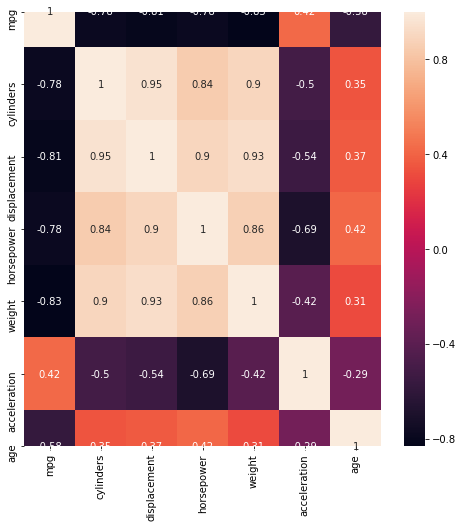

In [20]:
# correlation matrix
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(auto_df.corr(),annot = True)

In [21]:
x = auto_df.drop(['mpg'],axis = 1)
y=auto_df['mpg']

In [22]:
# Split the dataset
#y = auto_df['mpg']
#x = auto_df.drop(['mpg'], 'columns',inplace = True)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [27]:
# Build a Linear regression Model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = linear_model.predict(x_test)

In [37]:
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          3.79e-135
Time:                        01:12:12   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           78.8823      3.139     25.131   